When the notebook kernel shutsdown you will ALWAYS have to rerun the below code. The below code is used to navigate to your Google drive where the mini-project repo should be installed. Addtionally, it will install any needed packages, along with the `itcs4156` module. Lastly, you should recieve a popup confirming you want to allow access to your drive.

To set up Google collab and edit code  locally follow this [guide](https://paper.dropbox.com/doc/Windows-Mini-Projects-via-Collab--Bcv7PXEPr7NW27GLvQuyBcvbAQ-ilcOPagRqQ9jBRNYcc7R2) on DropBox

In [ ]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
print(f"Current path: {os.getcwd()}")

target_path = '/content/drive/MyDrive/mini-projects' 
if os.getcwd() != target_path:
  if os.path.exists(target_path):
    os.chdir(target_path)
  else:
    print(f"The mini-project directory could not be found at {target_path}")

print(f"New current path: {os.getcwd()}")

Below line installs the `itcs4156` module.

In [ ]:
# Installs ITCS 4156 as a module
!python setup.py develop

Below line installs all the requirements that might be missing inside of this Collab notebook instance. 

In [ ]:
# Installs requirements
!pip3 install -r requirements.txt

The below line tests if you can properly import the `itcs4156` module.

In [ ]:
# Checks that the itcs4156 module can be imported
try:
  import itcs4156
  print("SUCCESS: itcs4156 was imported!")
except ModuleNotFoundError:
  print("FAILURE: The itcs4156 module can not be imported. It seems it might not be installed.")

# ITCS 4156 - Programming Assignment 2 - Classification

<font color="blue"> type your name here </font>

# Imports

In [65]:
import random
import inspect
from typing import Tuple, List, Union
from pdb import set_trace

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline  
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Instructions

In this programming assignment you will be training **three** different kinds of classification models to classify handwritten digits given in the famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. The three models you'll be using are:

1. Rosenblatt's perceptron for binary classification using only the digits 0 and 1.
2. Naive Bayes for multi-class classification of ALL digits 0-9.
3. Logistic regression for multi-class classification of ALL digits 0-9

This mini-projects will work similarly to the labs where there are TODOs you must complete. Be on the lookout for **TODO** tags - they guide you towards what needs to be done. However, unlike the labs, most of the coding will now be left to you and there will be less direct instructions. The goal of this mini-project is for you to practice what your learned in the labs on your own! There are two types of TODOs:

1. **TODO**: This is a TODO that will be manually graded by the TA.
2. **AutoLab TODO**: This is a TODO that will be automatically graded using Autolab.

Below are the steps you'll need to take to complete this mini project.


### Step 1: Reviewing data, visualizations, and utility functions.
The first step is loading the MNIST data, going through the visualizations, and reviewing the data cleaning and transformations that need to be done. Furthermore, take time to review the utility functions, plots, and metrics functions so you know how to use them (most of these functions we have seen in prior labs).


### Step 2: Writing algorithms, setting hyper-parameters, and defining data cleaning/transformations

#### Defining Algorithm
Next, you will implement each of the 3 models. You will write your code in the files found in the `itcs4156/assigments/classification` directory for `Perceptron.py`, `NaiveBayes.py`, and `LogisticRegression.py`.To test your implementations, you will perform the training and validation within this notebook. Additionally, you will provide visualization of your results.

By default, this entire notebook will run and produce a score of around ~36 points. If you are struggling submitting working code (no errors are thrown during `run_eval()`) will at least give you some baseline points towards the mini-project.

#### Defining hyper-parameters and data cleaning/transformations
You will need to add code for setting hyper-parameters and data cleaning/transformations in the  `itcs4156/assigments/classification/train.py` file. Within the `train.py` is the class `HyperParametersAndTransforms`. Within the `HyperParametersAndTransforms` class are sub-classes that correspond to each algorithm: `Perceptron`, `NaiveBayes`, and `LogisticRegression`. These sub-classes are where you will set your hyper-parameters and data clean/transformations for EACH algorithm.

Within the `train.py` script the `# TODO` comments will help point you towards which hyper-parameters and data cleaning/transformation need to set. Any variable or function that is required to be set will be marked with the following tag: `# (REQUIRED) TODO`. If a TODO comment is marked as `# (OPTIONAL) TODO`, setting the hyper-parameter is optional and can be left alone unless you truly want to change it.

### Step 3: Local score estimation

Before submitting to Autolab, you will need to run the evaluation code using the `run_eval()` function located at the bottom of the notebook. This is a local test that uses the validation data to estimate the score you might receive on Autolab when using the actual testing data. Since you have a limited number of Autolab submissions be sure to perform well on these local tests before submitting. 



### Step 4: Submit to Autolab


If you are satisfied with the local performance of your models, then you can now submit to Autolab. To do so zip the `classification/` directory inside `itcs4156/assigments/` directory and then submit the `.zip` file to Autolab. 

Once submitted, you must wait for Autolab to grade your code. Depending on the amount of submissions and optimization of your code this can take up to 10 minutes. If your code exceeds the 10 minute wall, Autolab will stop grading your assignment and report a 0 as your grade. If this happens, you will need to figure out why your algorithm is taking too long to run and resubmit. Once again, use the local testing function `run_eval()` to debug your code as this is the same function that is called by Autolab (however Autolab uses a hidden test set instead of the validation set)! 

Below is a visualization of which folder to zip and submit to Autolab.

```
| - itcs4156
    | - assignments
        | - classification   <----------- Zip folder and submit to Autolab
            | - train.py
            | - Perceptron.py
            | - NaiveBayes.py
            | - LogisticRegression.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 2-classification.ipynb 
```



### Step 5: Submit to Canvas

Finally, you'll need to submit this notebook to Canvas. 

Below is a visualization of which notebook to submit to Canvas.
```
| - itcs4156
    | - assignments
        | - classification  
            | - train.py
            | - Perceptron.py
            | - NaiveBayes.py
            | - LogisticRegression.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 2-classification.ipynb <----- Upload this file on Canvas
```


## Additional Notes

- You are free to create your own class variables in  any class's `__init__()` method. If you want to pass class variables as hyper-parameters, instead of hard coding them, then also define them in the corresponding sub-class within the `HyperParametersAndTransforms` class.

- You are free to define your own classes, methods, or functions within each class or file EXCEPT in the `evaluate.py` script.

- For analysis, you can use any library you want in the notebook. However, matplolib and seaborn will be unavailable in the evaluation environment so refrain from importing them with the python files.

- Even though scikit-learn is available during evaluation, you should be implementing your own algorithms instead of using the library. This will be reviewed before the final grading. Please feel free to import other python modules contained within the `requirements.txt` file found in the root of the Gitlab repository. These include libraries such as NumPy and Pandas. However, keep in mind the above constraints on importing plotting libraries. 

- **Epochs (number of iterations of data)**: While training your models locally, you can keep this number as high as you want. But please keep in mind, that for evaluation your job will have a maximum of **3 minutes** to finish training and prediction for all the three algorithms. So tune this parameter, keeping this information in mind. 

## Grading 

The final grading will be done using the **TEST** dataset split that you don't have access to. The test set will be used when you submit to **Autolab**. 80 points will come from whether or not you pass MSE checks (scoring system broken down in the next section). Partial credit is assigned based on your MSE value.

You will only get <u>5 submissions to Autolab</u>  for this lab. <u>**Only your final submission will be graded**</u>. Further, when you submit to Autolab you will only have <u>10 minutes (600 seconds) for ALL your algorithms to be trained and tested</u> .

Points | TODO Type | Description
--|----|----:
20 | In notebook TODOs | Visualize and anlyze results 
25 | Autolab TODO 1 | Perceptron 
25 | Autolab TODO 2 | Naive Bayes
30 | Autolab TODO 3 | Logistic Regression

Your Autolab ranking will be computed based on the following:
- total points earned
- average test accuracy 
- total execution time (the total amount of time it takes for all your algorithms to run)

Students who make it within the top 10 will receive 1 point of extra credit. Below is the breakdown of the scores/points that you can receive for each algorithm. 

### Scoring system for perceptron based on accuracy

You can receive a maximum of 25 points for the Perceptron algorithm. Below is the `rubric_perceptron()` function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

The `acc` argument is the accuracy you receive and the `max_score` argument is the maximum number of points you can receive (this varies per algorithm). The `score_percent` is determined by your `acc` score. The final score is computed by the following equation: `max_score * score_percent / 100.0`.

In [66]:
from itcs4156.assignments.classification.evaluate import rubric_perceptron
print(inspect.getsource(rubric_perceptron))

def rubric_perceptron(acc, max_score=25):
    score_percent = 0
    if acc >= 0.95:
        score_percent = 100
    elif acc >= 0.90:
        score_percent = 90
    elif acc >= 0.80:
        score_percent = 80
    elif acc >= 0.70:
        score_percent = 70
    elif acc >= 0.60:
        score_percent = 60
    elif acc >= 0.50:
        score_percent = 50
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



In [67]:
acc = 0.54
rubric_perceptron(acc)

12.5

### Scoring system for Naive Bayes based using accuracy
You can receive a maximum of 25 points for the Naive Bayes algorithm. Below is the `rubric_naive_bayes()` function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

In [68]:
from itcs4156.assignments.classification.evaluate import rubric_naive_bayes
print(inspect.getsource(rubric_naive_bayes))

def rubric_naive_bayes(acc, max_score=25):
    score_percent = 0
    if acc >= 0.75:
        score_percent = 100
    elif acc >= 0.65:
        score_percent = 90
    elif acc >= 0.55:
        score_percent = 80
    elif acc >= 0.40:
        score_percent = 70
    elif acc >= 0.30:
        score_percent = 60
    elif acc >= 0.20:
        score_percent = 50
    elif acc >= 0.10:
        score_percent = 45
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



In [69]:
acc = 0.70
rubric_naive_bayes(acc)

22.5

### Scoring scheme for Logistic Regression using accuracy

You can receive a maximum of 30 points for the logistic regression algorithm. Below is the `rubric_logistic_regression()` function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

In [70]:
from itcs4156.assignments.classification.evaluate import rubric_logistic_regression
print(inspect.getsource(rubric_logistic_regression))

def rubric_logistic_regression(acc, max_score=30):
    score_percent = 0
    if acc >= 0.85:
        score_percent = 100
    elif acc >= 0.80:
        score_percent = 90
    elif acc >= 0.75:
        score_percent = 80
    elif acc >= 0.70:
        score_percent = 70
    elif acc >= 0.60:
        score_percent = 60
    elif acc >= 0.50:
        score_percent = 55
    elif acc >= 0.40:
        score_percent = 50
    elif acc >= 0.30:
        score_percent = 45
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



In [71]:
acc = 0.76
rubric_logistic_regression(acc)

24.0

# Data Loading: MNIST Dataset

<img src="https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067" width=300 height=300>


The dataset you'll be using for this project is the famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset which contains images of handwritten digits 0 through 9. There are 60,000 images included in the dataset and each image is a gray scale image of size 28x28. Each pixel represents a feature which means there are $28*28$ or $784$ features per each data sample.

**The goal of the dataset is to classify each image of handwritten digits correctly!**

The dataset consists of 3 splits:

1. **Train**: Throughout this assignment you will be training your model using this data. There are approximately 44k training samples.
2. **Validation**: You will then use this set to tune your model and evaluate its performance. There are approximately 12k training samples.
3. **Test**: This split simulates real life data which we often don't have access to until the model is deployed. We have kept this split hidden from you and we will use it to judge the performance of your model on Autolab.

We will download the training and validation splits shortly. The test split will remain hidden from you and Autolab will use it compute your final grade. 

Even though this dataset is public, you will have a different version of training and validation splits that are curated for this assignment. The training and validation splits are downloaded automatically and the testing split is kept secret for evaluation done on Autolab.

First, let's download the training and validation dataset to your machine. To do so, we'll need the `MNISTDataset` class from our module which is located at `itcs4156.datasets.MNISTDataset` or in the `itcs4156/datasets/MNISTDataset.py` file.

In [72]:
from itcs4156.datasets.MNISTDataset import MNISTDataset

If you don't want to open the code via a text editor or IDE, we can use Python's `inspect` module to display the source code for us. Take a look at the `MNISTDataset` source code. Then method you want to pay attention to is the `load()` method which will load the data either as a Pandas DataFrame or NumPy array.

In [73]:
import inspect
print(inspect.getsource(MNISTDataset))

class MNISTDataset(Dataset):

    def __init__(self): 
        
        self.data_dir = os.path.join(os.path.dirname(os.path.abspath(__file__)), "data", "MNIST")

        self.data = {
           
            "urls" : {
                "train" : "https://drive.google.com/uc?export=download&id=1PepMZ-2uHWf0HO-PG9we03jJ46BRHNUJ",
                "val"  : "https://drive.google.com/uc?export=download&id=1ER4qAUWncgZLSfGL_-hKmMqhFbUaImYt"
            },

            "paths" : {
                "X_trn" : os.path.join(self.data_dir, 'train_images.csv'),
                "y_trn" : os.path.join(self.data_dir, 'train_labels.csv'),
                "X_vld" : os.path.join(self.data_dir, 'val_images.csv'),
                "y_vld" : os.path.join(self.data_dir, 'val_labels.csv')
            }
        }

        self.init_download()

    def init_download(self):
        if not os.path.exists(self.data_dir):
            os.makedirs(self.data_dir)
        for key, url in self.data["urls"].items():
       

Next, let's load the data by instantiating the `MNISTDataset` class. If you already have the data downloaded then the download will be skipped.

In [74]:
dataset = MNISTDataset()

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip



Below we load the data. Notice, the data is loaded as DataFrames! When we pass our data to the algorithms, we will convert them to NumPy arrays. However, when we pass our data to the data cleaning/transformation pipelines, we will pass DataFrames (just like in the labs).

In [75]:
# This can take a few seconds as the MNIST dataset is rather large!
X_trn_df, y_trn_df, X_vld_df, y_vld_df = dataset.load()
print(f"X_trn_df type: {type(X_trn_df)}")
print(f"y_trn_df type: {type(y_trn_df)}")
print(f"X_vld_df type: {type(X_vld_df)}")
print(f"y_vld_df type: {type(y_vld_df)}")

Loading dataset with Pandas...
Done!
X_trn_df type: <class 'pandas.core.frame.DataFrame'>
y_trn_df type: <class 'pandas.core.frame.DataFrame'>
X_vld_df type: <class 'pandas.core.frame.DataFrame'>
y_vld_df type: <class 'pandas.core.frame.DataFrame'>


Below are print statements to help you understand how the data is setup. Since we are working with images the data comes as a 2D array instead a 3D array of shape (data samples, width, height). This means our data will have the shape (data samples, features) where the number of features are equal to the width multiplied by the height (i.e., the number of pixels)!

Pay attention to the number of data samples, features, and classes the training and validation splits have. Also, pay attention to the number of data samples per class. Notice they are relatively equal!

In [76]:
print(f"Shape of training data X_trn_df: {X_trn_df.shape}")
print(f"Shape of training labels y_trn_df: {y_trn_df.shape}")

print(f"Shape of validation data X_vld_df: {X_vld_df.shape}")
print(f"Shape of validation labels y_vld_df: {y_vld_df.shape}")

class_labels, trn_class_counts = np.unique(y_trn_df['class'], return_counts=True)
_, vld_class_counts = np.unique(y_vld_df['class'], return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts}")

Shape of training data X_trn_df: (44800, 784)
Shape of training labels y_trn_df: (44800, 1)
Shape of validation data X_vld_df: (11200, 784)
Shape of validation labels y_vld_df: (11200, 1)

Unique class labels:
	[0 1 2 3 4 5 6 7 8 9]
Training labels unique class label counts:
	[4434 5003 4504 4564 4425 4001 4384 4641 4378 4466]
Validation labels unique class label counts:
	[1126 1274 1106 1144 1104 1039 1096 1149 1090 1072]


# Data Visualization and Exploration

Let's start off by visualizing what a single data sample from the MNIST dataset looks like. We do so using the `get_first_sample()` function which gets the first data sample from the passed DataFrame `X_trn_df`. 

Notice that the data sample has 784 features. Recall the the image dimensions are 28x28 which means we need to reshape the 784 features/pixels back into the shape 28x28 in order to properly visualize the data sample.

Below, we use a fancy Pandas DataFrame to visualize the first data sample which is a zero. When printing out the `first_sample_df` DataFrame you can see the pixel values are between 0 and 255. Since the images are given in gray scale, higher pixel values move towards absolute black and lower pixel values move towards absolute white. Here 0 corresponds to absolute black and 255 is absolute white. 

In [77]:
def get_first_sample(X_df):
    first_sample = X_df.iloc[0].values
    print(f"first_sample type: {type(first_sample)}")
    print("Shape of first sample BEFORE reshape:", first_sample.shape)
    first_sample = first_sample.reshape(28, 28)
    print("Shape of first sample AFTER reshape:", first_sample.shape)
    first_sample_df = pd.DataFrame(first_sample)
    
    return first_sample_df

first_sample_df = get_first_sample(X_trn_df)
first_sample_df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

first_sample type: <class 'numpy.ndarray'>
Shape of first sample BEFORE reshape: (784,)
Shape of first sample AFTER reshape: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,4,54,141,191,129,29,7,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,26,179,252,252,252,253,252,187,94,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,29,210,253,252,99,56,69,187,252,228,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,26,210,252,241,65,6,0,0,7,203,252,151,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,16,166,253,241,51,0,0,0,0,0,135,253,226,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,128,252,252,115,0,0,0,0,0,0,66,246,244,56,0,0,0,0,0,0


Next, we display some random samples from each of the 9 classes using the `display_classes()` function. Remember, MNIST contains handwritten digits for the digits 0 through 9.

In [78]:
import math

def display_classes(
    images: np.ndarray, 
    labels:np.ndarray,
    shape: tuple=(28,28),
    n_samples=5):
    """ Displays random samples from MNIST classes 
        
        Args:
            images: A NumPy array where each row is a data sample and
                each column corresponds to a pixel location.
                
            labels: A NumPy array where each row corresponds to an
                image label.
                
            shape: 2D Shape of the images. By default each data sample in images 
                should be a flattened array.
                
            n_samples: Number of samples to display 
                
    """
    # Get the unique class labels
    class_labels = np.unique(labels)
    # Compute the total number of images to plot
    plot_n_images = len(class_labels) * n_samples
    
    n_cols = n_samples
    # Compute the number of rows and round up
    n_rows = math.ceil(plot_n_images / n_cols)
    # Define subplot 
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
    # Plot images
    for i, label in enumerate(class_labels):
        # Find all class locations
        all_class_locs = np.where(labels==label)[0]
        # Randomly choose class data samples
        selected_class_locs = np.random.choice(all_class_locs, n_samples, replace=False)
        # Plot label/name per row
        axs[i, 0].set_ylabel(f"Class: {label}", size='large')
        
        for j, cls_loc in enumerate(selected_class_locs):
            # Reshape image into width x height
            img = images[cls_loc].reshape(shape)
            # Plot image
            axs[i,j].imshow(img, cmap=plt.cm.gray)
            # Disable x and y ticks
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])

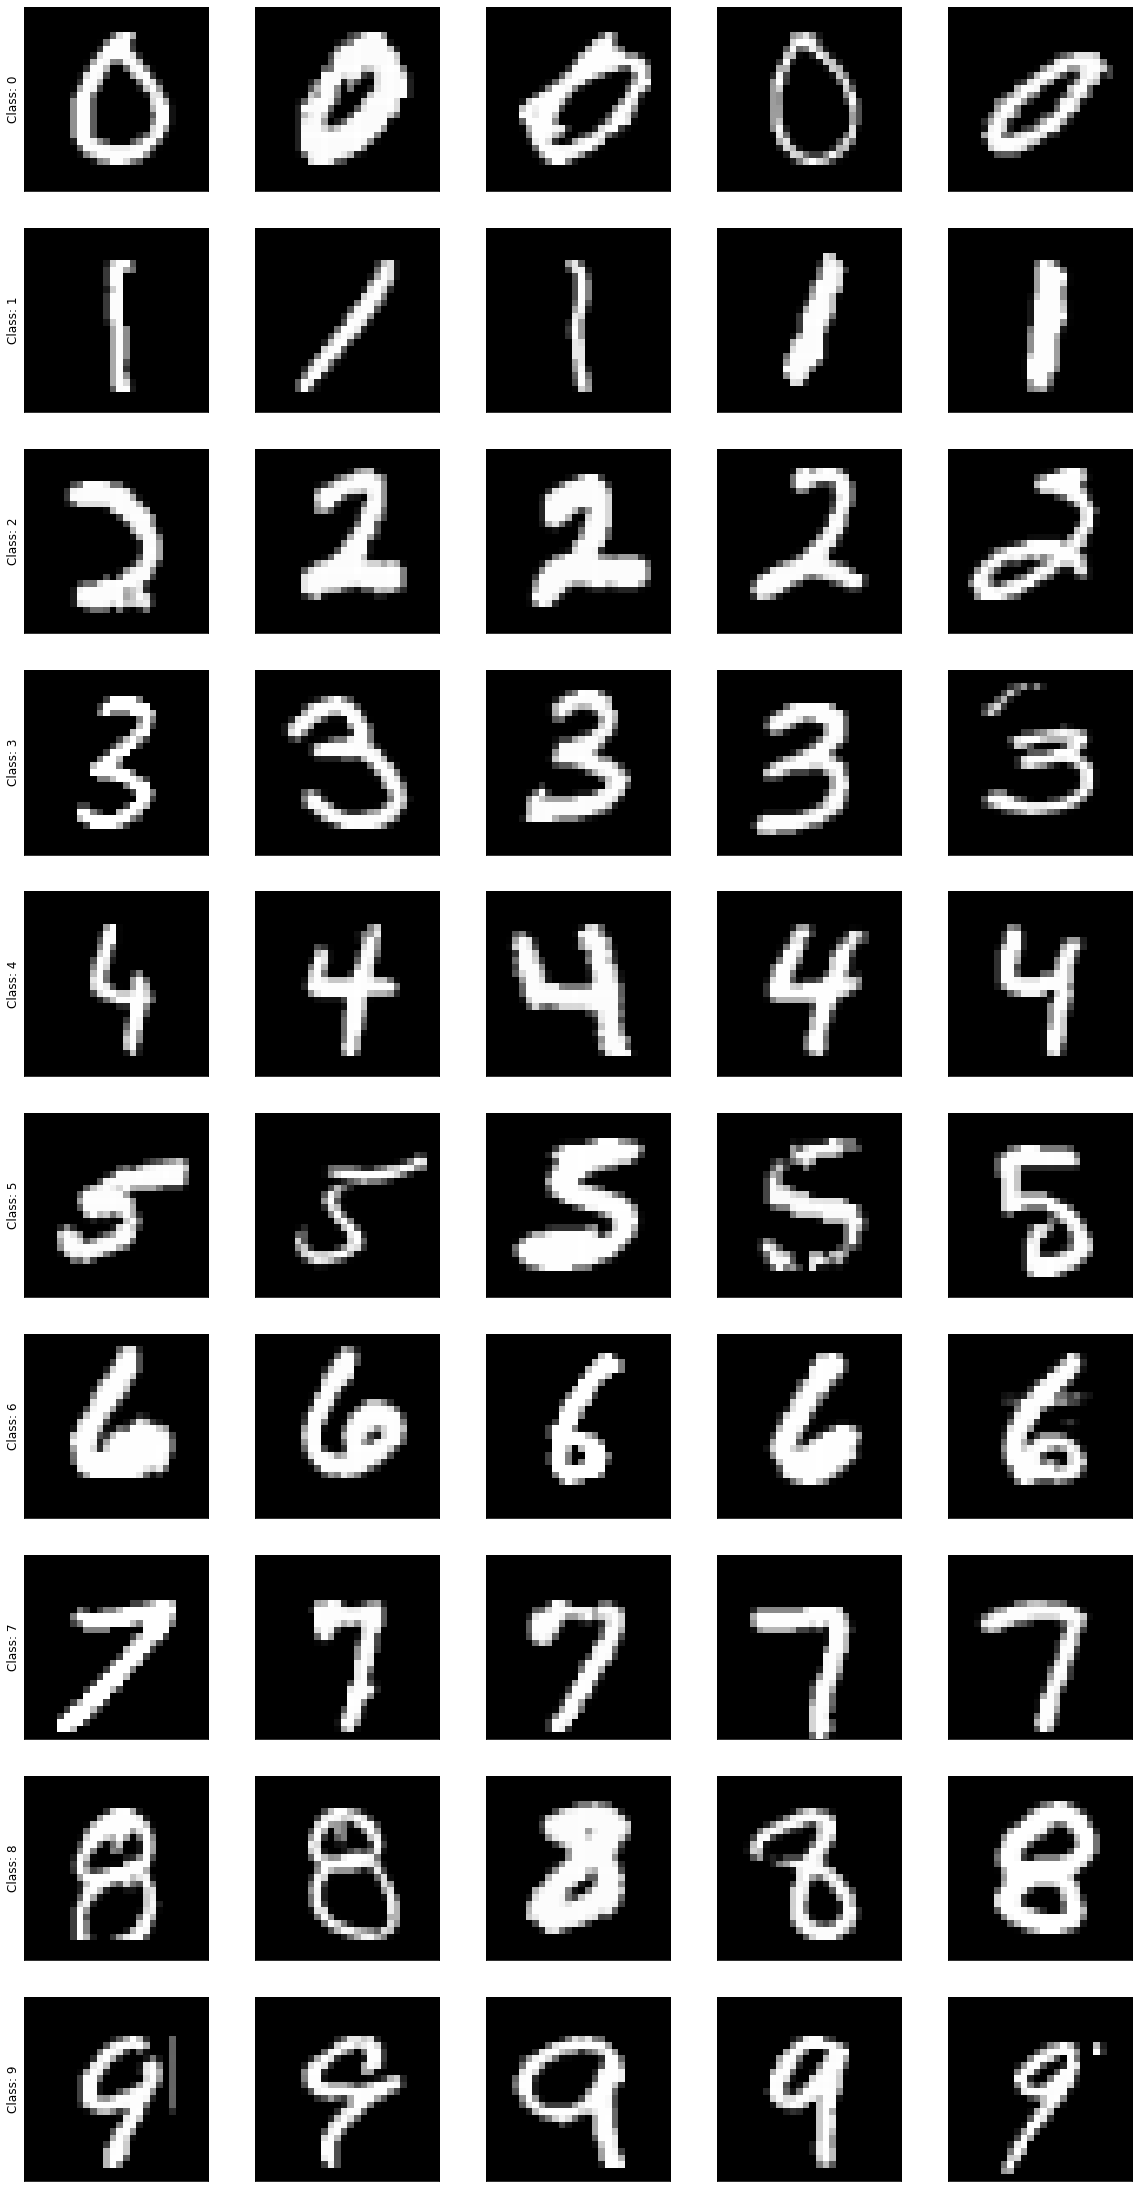

In [79]:
# This can take a few seconds to run
display_classes(X_trn_df.values, y_trn_df.values, shape=(28,28))

# Data Cleaning and Transformations Review

Below we review the data cleaning and transformation class you'll need to use to to preprocess the MNIST dataset before each algorithm. All these cleaning and transformation classes are located in the `itcs4156/util/data.py` script. 

## Standardizing

Recall the `Standardization` class used in the labs. We redefine this same class for you which is one way to standardize your features (i.e., pixels) of the MNIST data. 

In [80]:
from itcs4156.util.data import Standardization
print(inspect.getsource(Standardization))

class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self, epsilon=1e-6):
        self.epsilon = epsilon
    
    def fit(self, X: Union[np.ndarray, pd.DataFrame], y: pd.DataFrame = None):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        return (X  - self.mean) / (self.std + self.epsilon)



## Normalizing

A new type of normalization that is specific for images is given by the `ImageNormalization` class. All this class does is divide each feature (i.e., pixel) by 255. Recall the pixel values are between 0 and to 255. Doing so makes sure all values are between 0 and 1.

Sometimes performing this form of normalization on images is better than standardization and sometimes it isn't. You'll have to try both and see which works best!

In [81]:
from itcs4156.util.data import ImageNormalization
print(inspect.getsource(ImageNormalization))

class ImageNormalization(BaseEstimator, TransformerMixin): 
    def fit(self,
            X: pd.DataFrame, 
            y: pd.DataFrame = None) -> pd.DataFrame:
        return self
    
    def transform(self,
                  X: pd.DataFrame, 
                  y: pd.DataFrame = None) -> pd.DataFrame:
        return (X/255).astype(np.float16)



Below is an example of what imagine normalization does when dividing by 255.

In [82]:
mnist_norm = ImageNormalization()
first_sample = get_first_sample(X_trn_df)
norm_first_samples = mnist_norm.fit_transform(first_sample)
norm_first_samples.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

first_sample type: <class 'numpy.ndarray'>
Shape of first sample BEFORE reshape: (784,)
Shape of first sample AFTER reshape: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,0.211792,0.552734,0.749023,0.505859,0.113708,0.027451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101990,0.702148,0.988281,0.988281,0.988281,0.992188,0.988281,0.733398,0.368652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113708,0.823730,0.992188,0.988281,0.388184,0.219604,0.270508,0.733398,0.988281,0.894043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101990,0.823730,0.988281,0.945312,0.254883,0.023529,0.000000,0.000000,0.027451,0.795898,0.988281,0.592285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062744,0.650879,0.992188,0.945312,0.199951,0.000000,0.000000,0.000000,0.000000,0.000000,0.529297,0.992188,0.886230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.501953,0.988281,0.988281,0.450928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258789,0.964844,0.957031,0.219604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Adding bias

The last data preprocessing class is the `AddBias`. This is the same class used in the labs and can be used to add a columns of 1s to your data. Remember, only some of certain algorithms require a bias to be added.

In [83]:
from itcs4156.util.data import AddBias
print(inspect.getsource(AddBias))

class AddBias(BaseEstimator, TransformerMixin):
    def fit(self,
            X: pd.DataFrame, 
            y: pd.DataFrame = None) -> pd.DataFrame:
        return self
    
    def transform(self,
                  X: pd.DataFrame, 
                  y: pd.DataFrame = None) -> pd.DataFrame:
        X = X.copy()
        X.insert(0, 'bias', 1)
        return X



## One-hot

The final data preprocessing class is the `OneHotEncoding`. This is the same class used in the labs and can be used to convert categorical features and labels into one-hot encodings.

In [84]:
from itcs4156.util.data import OneHotEncoding
print(inspect.getsource(OneHotEncoding))

class OneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names='auto'):
        self.feature_names = feature_names
        self.encoder = OneHotEncoder(categories=feature_names, sparse=False)

    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        
        self.encoder.fit(X)
        
        # Store names of features
        try:
            self.feature_names = self.encoder.get_feature_names_out()
        except AttributeError:
            self.feature_names = self.encoder.get_feature_names()
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        
        one_hot =  self.encoder.transform(X)

        return pd.DataFrame(one_hot, columns=self.feature_names)



# Utility Functions, Plots, and Metrics

Below are the functions you'll see used throughout this mini-project.

## Confusion matrix

Below is the confusion matrix plotted using Seaborn. This is the same confusion matrix function we have been using in the labs.

In [85]:
def plot_confusion_matrix(y, y_hat, class_names=None, figsize=(6, 4)):
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)

    cfm = confusion_matrix(y_true=y, y_pred=y_hat)

    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes

    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    fig, ax = plt.subplots(figsize=figsize)  
    sns.heatmap(cfm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Acutal', fontsize=14)
    return cfm

## Metrics

Below are the metrics for accuracy, PPV, TPR, and TNR. Recall, we have seen all these functions in the classification labs.

In [86]:
from sklearn.metrics import accuracy_score
from itcs4156.util.metrics import accuracy, ppv, tpr, tnr

In [87]:
from itcs4156.util.metrics import accuracy
print(inspect.getsource(accuracy))

def accuracy(y, y_hat):
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)
    # Reshape labels and preds to be 2D arrays
    elif len(y.shape) == 1:
        y = y.reshape(-1, 1)
    if len(y_hat.shape) == 1:
        y_hat = y_hat.reshape(-1, 1)
    
    return accuracy_score(y, y_hat)



In [88]:
from itcs4156.util.metrics import ppv
print(inspect.getsource(ppv))

def ppv(tp, fp):
    return tp / (tp + fp)



In [89]:
from itcs4156.util.metrics import tpr
print(inspect.getsource(tpr))

def tpr(tp, fn):
    return tp / (tp + fn)



In [90]:
from itcs4156.util.metrics import tnr
print(inspect.getsource(tnr))

def tnr(tn, fp):
    return tn / (tn + fp)



Below is the function for computing and nicely displaying the  PPV, TPR, and TNR scores per class. We have also seen this function throughout the labs, although it has been slightly updated here.

In [91]:
from itcs4156.util.metrics import compute_scores
print(inspect.getsource(compute_scores))

def compute_scores(y, y_hat, class_names=None):
    def print_scores(tn, fn, fp, tp):

        print(f"\tPPV ratio tp/(tp+fp): {tp}/{tp+fp}")
        print(f"\tPPV (precision): {ppv(tp=tp, fp=fp) }\n")

        print(f"\tTPR ratio tp/(tp+fn): {tp}/{tp+fn}")
        print(f"\tTPR (recall/sensitivity): {tpr(tp=tp, fn=fn)}\n")

        print(f"\tTNR ratio tn/(tn+fp): {tn}/{tn+fp}")
        print(f"\tTNR (specificity): {tnr(tn=tn, fp=fp)}")
    
    if class_names is None:
        class_names = {}
    
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)
    
    cm = confusion_matrix(y_true=y, y_pred=y_hat)
    
    # Computing multi-class classification tp, fn, tp, tn
    fp = cm.sum(axis=0) - np.diag(cm)  
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    ppv_ = ppv(tp=tp, fp=fp) 
    tpr_ = tpr(tp=tp, fn=fn)
    tnr_ = tnr(tn=tn, fp=fp)
    
 

# Setting Hyper-parameters and Sklearn Pipelines
Recall, Step 2 requires that for each algorithm you set hyper-parameters (see Step 2 for more details). Below is the `HyperParametersAndTransforms` class contained within `itcs4156/assignments/classification/train.py` script. 


Here the `HyperParametersAndTransforms` class contains sub-class for the  `Perceptron`, `NaiveBayes` and `LogisticRegression` algorithms. Each sub-class will have a dictionary called `model_kwargs` and `data_prep_kwargs`. If a sub-class DOES NOT have either one of these it means no hyper-parameters are required! 

Within each one of these sub-class you need to set the hyper-parameters and data cleaning/transformation keys which are marked by the `# TODO` comments. These TODO comments indicate where you need to set the hyper-parameters and where you need to set the feature/target Sklearn `Pipeline` instances. Any tags marked as `# TODO (REQUIRED)` will be required while any tags marked as `# TODO (OPTIONAL)` can be optional depending on the context.


In [92]:
from itcs4156.assignments.classification.train import HyperParametersAndTransforms as hpt
print(inspect.getsource(hpt))

class HyperParametersAndTransforms():
    
    @staticmethod
    def get_params(name):
        model = getattr(HyperParametersAndTransforms, name)
        params = {}
        for key, value in model.__dict__.items():
            if not key.startswith('__') and not callable(key):
                if not callable(value) and not isinstance(value, staticmethod):
                    params[key] = value
        return params
    
    class Perceptron():
        """Kwargs for classifier the Perceptron class and data prep"""
        model_kwargs = dict(
            alpha = None,  # TODO (REQUIRED) Set learning rate 
            epochs = 1,  # TODO (REQUIRED) Set epochs
            seed = None, # TODO (OPTIONAL) Set seed for reproducible results
        )

        data_prep_kwargs = dict(
            # TODO (OPTIONAL) Add Pipeline() definitions below
            target_pipe = None,
            # TODO (REQUIRED) Add Pipeline() definitions below
            feature_pipe = None
        )
        
 

## Hyper-parameters

### Defining  `model_kwargs`
Recall that step 2 requires defining hyper-parameters for each algorithm. The `model_kwargs` dictionary is where you will define any keyword arguments (kwargs) that will be passed to the corresponding algorithm class.  

For example, `model_kwargs` for the `HyperParametersAndTransforms.Perceptron` sub-class will be passed to the `Perceptron` class located in `itcs4156/classification/perceptron.py` script . All the kwargs should correspond to the arguments taken in by the `__init__()` method for each class (these will differ for each class).

Below is and example of accessing the `HyperParametersAndTransforms.Perceptron` sub-class's `model_kwargs` dictionary.

In [93]:
hpt.Perceptron.model_kwargs

{'alpha': None, 'epochs': 1, 'seed': None}

## Sklearn Pipelines

### Defining `data_prep_kwargs`

Recall that step 2 requires you to define data cleaning and transformations similar to what we do in the labs. To do so, you will need to create a Sklearn `Pipeline` class instance which will apply any data cleaning and transformations that you specify. We will be applying all the data preprocessing AFTER splitting our data. Thus, each sub-class within `HyperParametersAndTransforms` will contain a class variable called `data_prep_kwargs` which is a dictionary. `data_prep_kwargs` will contain two keys that need to be set: `feature_pipe` and `target_pipe`.

- `feature_pipe`: Should be set to a Sklearn `Pipeline` class instance. The `feature_pipe` key will hold all the preprocessing steps to clean and transform your features. 

- `target_pipe`: Should be set to a Sklearn `Pipeline` class instance. The `target_pipe` key will hold all the preprocessing steps to clean and transform your targets. 

For example, `data_prep_kwargs` for the `HyperParametersAndTransforms.Perceptron` sub-class will be passed to the `MNISTDataPreparation` class located in `itcs4156/datasets/DataPreparation.py` script . All the kwargs should correspond to the arguments taken in by the `__init__()` method for the `MNISTDataPreparation` class.

Below is and example of accessing the `HyperParametersAndTransforms.Perceptron` sub-class's `data_prep_kwargs` dictionary. 

In [94]:
hpt.Perceptron.data_prep_kwargs

{'target_pipe': None, 'feature_pipe': None}

### What is the `DataPreparation` class?

So which class do the `data_prep_kwargs` get passed to? Well, from now on, every dataset that we will see utilize its own implementation of the `DataPreparation` class given below. The `DataPreparation` will apply any  preprocessing steps you specify within `data_prep_kwargs`. Notice, that the `DataPreparation` class has the following methods and variables:

- `self.feature_pipe`: Will be passed the Sklearn Pipeline that YOU define within the `feature_pipe` key for the `data_prep_kwargs` dictionary.


- `self.target_pipe`: Will be passed the Sklearn Pipeline that YOU define within the `target_pipe` key for the `data_prep_kwargs` dictionary.


- `fit()`: Method that calls the each pipelines `fit()` method. For example, `self.feature_pipe.fit()` and `self.target_pipe.fit()` are called.


- `transform()`: Method that calls the each pipelines `transform()` method. For example, `self.feature_pipe.transform()` and `self.target_pipe.transform()` are called.


- `fit_transform()`: Method that calls the each pipelines `fit_transform()` method. For example, `self.feature_pipe.fit_transform()` and `self.target_pipe.fit_transform()` are called.


- `data_prep()`: Is an empty method that will be implemented for each dataset that inherits from `DataPreparation`. In general, this method will be implemented to run any data preprocessing by calling the `fit_transform()` method on the training data and the `transform()` method on the validation data. This method will also contain any additional splitting or preprocessing that is required for a given dataset. You should notice that this method will act very similar to the `data_prep()` function we often define in the labs!

In [95]:
from itcs4156.datasets.DataPreparation import DataPreparation
print(inspect.getsource(DataPreparation))

class DataPreparation():
    def __init__(self, target_pipe, feature_pipe):
        self.target_pipe = target_pipe
        self.feature_pipe = feature_pipe
        
    @abstractmethod
    def data_prep():
        pass
    
    def fit(self, X, y=None):
        if self.target_pipe  is not None:
            self.target_pipe.fit(y)
            
        if self.feature_pipe is not None:
            self.feature_pipe.fit(X)

    def transform(self, X, y=None):
        if self.target_pipe is not None:
            y = self.target_pipe.transform(y)
            
        if self.feature_pipe is not None:
            X = self.feature_pipe.transform(X)

        return X, y
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        X, y = self.transform(X, y)
        return X, y



### What is the `MNISTDataPreparation` class?
The `MNISTDataPreparation` class is the implementation of `DataPreparation` made specifically for the MNIST dataset. This class will load, apply YOUR cleaning and transformation, and apply any additional preprocessing steps. Notice that this class implements the `data_prep()` method that was left empty by its parent, the `DataPreparation` class.

- `data_prep()`: Loads the MNIST data applies any data cleaning or transformations that you specified with `data_prep_kwargs`. It also applies additional preprocessing steps such as binarizing the data and converting the data types to NumPy arrays. Note the following kwargs can be passed:

    - `binarize`: Constrains the MNIST problem into a binary problem where the only available images are for 0s and 1s. Thus, the goal is to classify 0s vs 1s.

    - `return_array`: Returns all data as NumPy arrays instead of Pandas DataFrames.

In [96]:
from itcs4156.datasets.DataPreparation import MNISTDataPreparation
print(inspect.getsource(MNISTDataPreparation))

class MNISTDataPreparation(DataPreparation):
    def __init__(self, target_pipe, feature_pipe):
        super().__init__(target_pipe, feature_pipe)
        
    def data_prep(self, binarize=False, return_array=False):
        mnist_dataset = MNISTDataset()
        X_trn_df, y_trn_df, X_vld_df, y_vld_df = mnist_dataset.load()
        
        # Converts MNIST problem to classifying ONLY 1s vs 0s
        if binarize:
            X_trn_df, y_trn_df = binarize_classes(
                X_trn_df, 
                y_trn_df, 
                pos_class=[1],
                neg_class=[0], 
            )
            
            X_vld_df, y_vld_df = binarize_classes(
                X_vld_df, 
                y_vld_df, 
                pos_class=[1], 
                neg_class=[0], 
            )

        X_trn_df, y_trn_df = self.fit_transform(X=X_trn_df, y=y_trn_df)
        X_vld_df, y_vld_df = self.transform(X=X_vld_df, y=y_vld_df)

        if return_array:
            print("Returning data as

#  Perceptron: Binary Classification

The first algorithm you'll implement is the perceptron algorithm. For this algorithm you will perform binary classification using the 0 and 1 digit data samples ONLY (we will ignore the rest of the data samples for other classes). Thus, the goal will be to classify each data sample either as the digit 0 or 1. 

Below are the class labels mapped to the class names. Here the negative class will be the digit 0 (label -1) and the positive class will be the digit 1 (label 1).

In [97]:
class_names = {
    -1: 'zero',
     1: 'one'
}

class_names

{-1: 'zero', 1: 'one'}

## Data Cleaning and Transformation

#### Autolab TODO 1

Within the `HyperParametersAndTransforms.Perceptron` class, set the `feature_pipe` and `target_pipe` keys to store instances of Sklearn's `Pipeline`. You have access to the following data cleaning/transformation classes which are imported for you within the `train.py` file: 

- `AddBias` 
- `Standardization`
- `ImageNormalization`
- `OneHotEncoding`

Choose the classes YOU think need to be applied in order to prepare the MNIST data for the Perceptron algorithm. If needed, feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.

1. (REQUIRED) Set the `feature_pipe` key to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (OPTIONAL) Optionally, you can choose to set the `target_pipe` key to an instance of Sklearn's `Pipeline`. If you do NOT wish to set the `target_pipe` leave it equal to None `target_pipe = None`. If you do wish to set the `target_pipe` pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the targets. 

Once you defined the `Pipeline` class instance you can test the `feature_pipe` and `target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method for an `MNISTDataPreparation` class instance. Additionally, the below code will load the data for this section.

In [98]:
p_data_prep_kwargs = hpt.Perceptron.data_prep_kwargs
p_data_prep_kwargs

{'target_pipe': None, 'feature_pipe': None}

In [99]:
mnist_prep = MNISTDataPreparation(**p_data_prep_kwargs)
data = mnist_prep.data_prep(binarize=True, return_array=True)
X_trn_p, y_trn_p, X_vld_p, y_vld_p = data

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Loading dataset with Pandas...
Done!
Returning data as NumPy array...


Below is some useful information regarding the data you just loaded! Notice we only have two classes! Recall the `binarize` kwarg makes it so the ` mnist_prep.data_prep()` method returns only images for the 0 and 1 digits. 

In [100]:
print(f"Shape of training data X_trn: {X_trn_p.shape}")
print(f"Shape of training labels y_trn: {y_trn_p.shape}")

print(f"Shape of validation data X_vld: {X_vld_p.shape}")
print(f"Shape of validation labels y_vld: {y_vld_p.shape}")

class_labels_p, trn_class_counts_p = np.unique(y_trn_p, return_counts=True)
_, vld_class_counts_p = np.unique(y_vld_p, return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels_p}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts_p}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts_p}")

print(f"\nTraining data value range:\n\tmin:{np.min(X_trn_p)} max:{np.max(X_trn_p)}")
print(f"Validation data value range:\n\tmin:{np.min(X_vld_p)} max:{np.max(X_vld_p)}")

Shape of training data X_trn: (9437, 784)
Shape of training labels y_trn: (9437, 1)
Shape of validation data X_vld: (2400, 784)
Shape of validation labels y_vld: (2400, 1)

Unique class labels:
	[-1  1]
Training labels unique class label counts:
	[4434 5003]
Validation labels unique class label counts:
	[1126 1274]

Training data value range:
	min:0 max:255
Validation data value range:
	min:0 max:255


## Training

#### Autolab TODO 2
Fill in the code for the `fit()` and `predict()` methods for `Perceptron` class in the `itcs4156/assignments/classification/Perceptron.py` file. Additionally, set the hyper-parameters in the  `HyperParametersAndTransforms.Perceptron` sub-class within the `itcs4156/assignments/classification/train.py` file.

1. Complete the `fit()` method which should run Rosenblatt's perceptron algorithm to learn the weights `self.w`. There is no need to implement th pocket algorithm unless you choose to do so. Be sure to update and store the learned weights into `self.w`.

1. Complete the `predict()` method which should make a prediction and return the output using the learned weights `self.w`. Store the predicted labels into `y_hat`.

1. Set the hyper-parameters `alpha` and `epochs` within the `HyperParametersAndTransforms.Perceptron`class.

Below is the import for the `Perceptron` class located in `itcs4156/assignments/classification/Perceptron.py` script.

In [101]:
from itcs4156.assignments.classification.Perceptron import Perceptron

The below code prints the hyper-parameters you set the `HyperParametersAndTransforms.Perceptron`class.

In [102]:
p_model_kwargs = hpt.Perceptron.model_kwargs
p_model_kwargs

{'alpha': None, 'epochs': 1, 'seed': None}

Run the below code to train your algorithm implementation uses the hyper-parameters specified by `HyperParametersAndTransforms.Perceptron` sub-class. 

In [103]:
percep = Perceptron(**p_model_kwargs)

percep.fit(X_trn_p, y_trn_p)

Run the below code to check the performance of your algorithm implementation using accuracy, PPV, TPR, TNR, and a confusion matrix.

In [104]:
trn_preds_p = percep.predict(X_trn_p)

accuracy(y=y_trn_p, y_hat=trn_preds_p)

0.5301472925717918

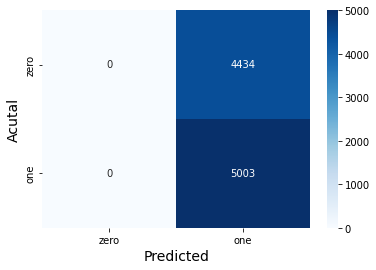

In [105]:
cm = plot_confusion_matrix(
    y=y_trn_p, 
    y_hat=trn_preds_p, 
    class_names=class_names
)

In [106]:
compute_scores(y_trn_p, trn_preds_p, class_names=class_names);

Scores for binary problem: positive label is one
	PPV ratio tp/(tp+fp): 5003/9437
	PPV (precision): 0.5301472925717918

	TPR ratio tp/(tp+fn): 5003/5003
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 0/4434
	TNR (specificity): 0.0


/home/dev/mnt/2022-spring/itcs4156/util/metrics.py:57: RuntimeWarning: invalid value encountered in true_divide
  return tp / (tp + fp)


## Validating

#### TODO 1 (8 points total)
Now, make predictions for the validation set and analyze the results. 

**Coding (4 points) - To receive <u>full points</u> you must have the following:**


1. Make predictions using your `X_vld_p` data.
2. Compute and display validation accuracy. Feel free to display `accuracy()` function.
3. Compute and display the validation confusion matrix. Feel free to use the  `plot_confusion_matrix()` function.
4. Compute and display the PPV, TPR, and TNR scores for all classes. Feel free to use the `compute_scores()` function.

**Written (4 points)** 

5. (1-2 sentences) Based on the confusion matrix, PPV, TPR, and TNR scores, which classes are hindering the accuracy of the model the most - if any? In other words, which classes are frequently being misclassified? Your answer should cite observations from confusion matrix, PPV, TPR, and TNR scores! 

In [107]:
# TODO add evaluation analysis below (create more code cells as needed)

    TODO 1 -  Add written response below
    --------------------------------------
    
    1. <add response to TODO 1.5 here>

# Naive Bayes

In this second task, we will be using Naive Bayes to perform multi-class classification using ALL the digits 0 through 9.

## Data Cleaning and Transformation

#### Autolab TODO 3

Within the `HyperParametersAndTransforms.NaiveBayes` class, set the `feature_pipe` and `target_pipe` keys to store instances of Sklearn's `Pipeline`. You have access to the following data cleaning/transformation classes which are imported for you within the `train.py` file: 

- `AddBias` 
- `Standardization`
- `ImageNormalization`
- `OneHotEncoding`

Choose the classes YOU think need to be applied in order to prepare the MNIST data for the Naive Bayes algorithm. If needed, feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.

1. (REQUIRED) Set the `feature_pipe` key to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (OPTIONAL) Optionally, you can choose to set the `target_pipe` key to an instance of Sklearn's `Pipeline`. If you do NOT wish to set the `target_pipe` leave it equal to None `target_pipe = None`. If you do wish to set the `target_pipe` pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the targets. 

Once you defined the `Pipeline` class instance you can test the `feature_pipe` and `target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method for an `MNISTDataPreparation` class instance. Additionally, the below code will load the data for this section. 

In [108]:
nb_data_prep_kwargs = hpt.NaiveBayes.data_prep_kwargs
nb_data_prep_kwargs

{'target_pipe': None, 'feature_pipe': None}

In [109]:
mnist_prep = MNISTDataPreparation(**nb_data_prep_kwargs)
data = mnist_prep.data_prep(return_array=True)
X_trn_nb, y_trn_nb, X_vld_nb, y_vld_nb = data

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Loading dataset with Pandas...
Done!
Returning data as NumPy array...


Below is some useful information regarding the data you just loaded! Notice we only have all 10 classes now! 

In [110]:
print(f"Shape of training data X_trn: {X_trn_nb.shape}")
print(f"Shape of training labels y_trn: {y_trn_nb.shape}")

print(f"Shape of validation data X_vld: {X_vld_nb.shape}")
print(f"Shape of validation labels y_vld: {y_vld_nb.shape}")

class_labels_nb, trn_class_counts_nb = np.unique(y_trn_nb, return_counts=True)
_, vld_class_counts_nb = np.unique(y_vld_nb, return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels_nb}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts_nb}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts_nb}")

print(f"\nTraining data value range:\n\tmin:{np.min(X_trn_nb)} max:{np.max(X_trn_nb)}")
print(f"Validation data value range:\n\tmin:{np.min(X_vld_nb)} max:{np.max(X_vld_nb)}")

Shape of training data X_trn: (44800, 784)
Shape of training labels y_trn: (44800, 1)
Shape of validation data X_vld: (11200, 784)
Shape of validation labels y_vld: (11200, 1)

Unique class labels:
	[0 1 2 3 4 5 6 7 8 9]
Training labels unique class label counts:
	[4434 5003 4504 4564 4425 4001 4384 4641 4378 4466]
Validation labels unique class label counts:
	[1126 1274 1106 1144 1104 1039 1096 1149 1090 1072]

Training data value range:
	min:0 max:255
Validation data value range:
	min:0 max:255


## Training

#### Autolab TODO 4
Fill in the code for the `fit()`, `predict()`, and other helper methods for `NaiveBayes` class in the `itcs4156/assignments/classification/NaiveBayes.py` file.

1. Complete the `fit()` method by computing the priors and Gaussian parameters. To do so, first finish and then call the `compute_parameters()` and `compute_priors()` methods.
    1. Complete the `compute_parameters()` method by computing the means and stds for the Gaussian distribution which will then be used to comput the likelihoods. Store the computed means and stds into `self.means` and `self.stds`.
    1. Complete the `compute_priors()` method by computing the priors and log priors which will be used when making predictions using MAP. Store the computed priors and log priors into `self.priors` and `self.log_priors`.
  
  
2. Complete the `predict()` method by computing the log likelihoods and log priors. To do so, first finishing and then call the `compute_log_likelihoods()` method. You'll also need to access the class variables `self.log_priors`  and `self.class_labels` you set when running the `compute_parameters()` and `compute_priors()` methods within the `fit()` method. Store the predicted labels into `y_hat`.
    1. Complete the `compute_log_likelihoods()` method  by computing the log likelihoods of the passed data `X`. Use the `self.means` and `self.stds` class variables you set in the `compute_parameters()` method along with the `log_gaussian_distribution()` method which is defined for you. The `log_gaussian_distribution()`  will apply the log to your feature likelihoods for you so you don't need to!

Below is the import for the `NaiveBayes` class located in `itcs4156/assignments/classification/NaiveBayes.py` script.

In [111]:
from itcs4156.assignments.classification.NaiveBayes import NaiveBayes

The below code prints the hyper-parameters you set the `HyperParametersAndTransforms.NaiveBayes` class.

In [112]:
nb_model_kwargs = hpt.NaiveBayes.model_kwargs
nb_model_kwargs

{'smoothing': 0.1}

Run the below code to train your algorithm implementation uses the hyper-parameters specified by `HyperParametersAndTransforms.NaiveBayes` sub-class.

**WARNING: This can take a few minutes to run depending on your implementation and speed of your computer.**


In [113]:
nb = NaiveBayes(**nb_model_kwargs)

nb.fit(X_trn_nb, y_trn_nb)

Run the below code to check the performance of your algorithm implementation using accuracy, PPV, TPR, TNR, and a confusion matrix.

In [114]:
trn_preds_nb = nb.predict(X_trn_nb)

accuracy(y=y_trn_nb, y_hat=trn_preds_nb)

0.11167410714285714

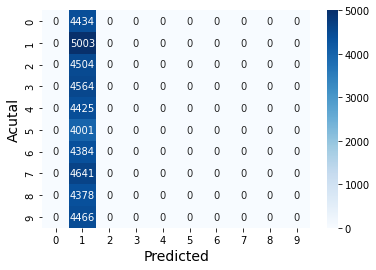

In [115]:
cm = plot_confusion_matrix(
    y=y_trn_nb, 
    y_hat=trn_preds_nb
)

In [116]:
compute_scores(y=y_trn_nb, y_hat=trn_preds_nb);

Scores for class 0
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4434
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40366/40366
	TNR (specificity): 1.0
Scores for class 1
	PPV ratio tp/(tp+fp): 5003/44800
	PPV (precision): 0.11167410714285714

	TPR ratio tp/(tp+fn): 5003/5003
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 0/39797
	TNR (specificity): 0.0
Scores for class 2
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4504
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40296/40296
	TNR (specificity): 1.0
Scores for class 3
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4564
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40236/40236
	TNR (specificity): 1.0
Scores for class 4
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4425
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40375/40375
	TNR (specificity): 1.0
Scores for class 5
	PPV rati

/home/dev/mnt/2022-spring/itcs4156/util/metrics.py:57: RuntimeWarning: invalid value encountered in true_divide
  return tp / (tp + fp)
/home/dev/mnt/2022-spring/itcs4156/util/metrics.py:57: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


## Validating

#### TODO 2 (6 points total)
Now, make predictions for the validation set and analyze the results. 

**Coding (4 points) - To receive <u>full points</u> you must have the following:**


1. Make predictions using your `X_vld_nb` data.
2. Compute and display validation accuracy. Feel free to display `accuracy()` function.
3. Compute and display the validation confusion matrix. Feel free to use the  `plot_confusion_matrix()` function.
4. Compute and display the PPV, TPR, and TNR scores for all classes. Feel free to use the `compute_scores()` function.

**Written (2 points)** 

5. (1-2 sentences) Based on the confusion matrix, PPV, TPR, and TNR scores, which classes are hindering the accuracy of the model the most - if any? In other words, which classes are frequently being misclassified? Your answer should cite observations from confusion matrix, PPV, TPR, and TNR scores!

In [117]:
# TODO add evaluation analysis below (create more code cells as needed)

    TODO 2 -  Add written response below
    --------------------------------------
    
    1. <add response to TODO 2.5 here>

# Multi-Class Classification with Logistic Regression

In this 3rd task, we will be using logistic regression to perform multi-class classification using ALL the digits 0 through 9 once again.

## Data Cleaning and Transformation

#### Autolab TODO 5

Within the `HyperParametersAndTransforms.NaiveBayes` class, set the `feature_pipe` and `target_pipe` keys to store instances of Sklearn's `Pipeline`. You have access to the following data cleaning/transformation classes which are imported for you within the `train.py` file: 

- `AddBias` 
- `Standardization`
- `ImageNormalization`
- `OneHotEncoding`

Choose the classes YOU think need to be applied in order to prepare the MNIST data for the Naive Bayes algorithm. If needed, feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.

1. (REQUIRED) Set the `feature_pipe` key to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (REQUIRED) Set the `target_pipe` key to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features. 

Once you defined the `Pipeline` class instance you can test the `feature_pipe` and `target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method for an `MNISTDataPreparation` class instance. Additionally, the below code will load the data for this section. 

In [118]:
p_data_prep_kwargs = hpt.LogisticRegression.data_prep_kwargs
p_data_prep_kwargs

{'target_pipe': None, 'feature_pipe': None}

In [119]:
mnist_prep = MNISTDataPreparation(**p_data_prep_kwargs)
data = mnist_prep.data_prep(return_array=True)
X_trn_lgr, y_trn_lgr, X_vld_lgr, y_vld_lgr = data

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Loading dataset with Pandas...
Done!
Returning data as NumPy array...


Below is some useful information regarding the data you just loaded! Notice we have all 10 classes!. 

In [120]:
print(f"Shape of training data X_trn: {X_trn_lgr.shape}")
print(f"Shape of training labels y_trn: {y_trn_lgr.shape}")

print(f"Shape of validation data X_vld: {X_vld_lgr.shape}")
print(f"Shape of validation labels y_vld: {y_vld_lgr.shape}")

class_labels_lgr, trn_class_counts_lgr = np.unique(np.argmax(y_trn_lgr, axis=1), return_counts=True)
_, vld_class_counts_lgr = np.unique(np.argmax(y_vld_lgr, axis=1), return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels_lgr}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts_lgr}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts_lgr}")

print(f"\nTraining data value range:\n\tmin:{np.min(X_trn_lgr)} max:{np.max(X_trn_lgr)}")
print(f"Validation data value range:\n\tmin:{np.min(X_vld_lgr)} max:{np.max(X_vld_lgr)}")

Shape of training data X_trn: (44800, 784)
Shape of training labels y_trn: (44800, 1)
Shape of validation data X_vld: (11200, 784)
Shape of validation labels y_vld: (11200, 1)

Unique class labels:
	[0]
Training labels unique class label counts:
	[44800]
Validation labels unique class label counts:
	[11200]

Training data value range:
	min:0 max:255
Validation data value range:
	min:0 max:255


## Training

#### Autolab TODO 6
Fill in the code for the `fit()` and `predict()` and other helper methods for `LogisticRegression` class in the `itcs4156/assignments/classification/LogisticRegression.py` file.

1. Complete the `fit()` method by using either batch or mini-batch gradient descent to learn the best weights to classify the data. You'll need to finish and also call the `softmax()` method to complete this method. Also, update and store the learned weights into `self.w`. 
    1. Complete the `softmax` method by adding code to return the softmax. Don't forget to subtract the max from `z` to maintain  numerical stability!

1. Complete the `predict()` method by adding code to make a prediction given the learned weights `self.w`. Store the predicted labels into `y_hat`.

Below is the import for the `LogisticRegression` class located in `itcs4156/assignments/classification/LogisticRegression.py` script.

In [121]:
from itcs4156.assignments.classification.LogisticRegression import LogisticRegression

The below code prints the hyper-parameters you set the `HyperParametersAndTransforms.LogisticRegression`class.

In [122]:
lgr_model_kwargs = hpt.LogisticRegression.model_kwargs
lgr_model_kwargs

{'alpha': None, 'epochs': 1, 'seed': None, 'batch_size': None}

Run the below code to train your algorithm implementation uses the hyper-parameters specified by `HyperParametersAndTransforms.LogisticRegression` sub-class.

**WARNING: This can take a few minutes to run depending on your implementation and speed of your computer.**

In [123]:
lgr = LogisticRegression(**lgr_model_kwargs)

lgr.fit(X_trn_lgr, y_trn_lgr)

Run the below code to check the performance of your algorithm implementation using accuracy, PPV, TPR, TNR, and a confusion matrix.

In [124]:
trn_preds_lgr = lgr.predict(X_trn_lgr)

accuracy(y=y_trn_lgr, y_hat=trn_preds_lgr)

0.11167410714285714

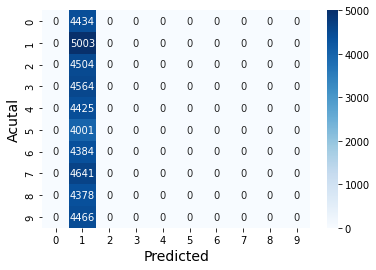

In [125]:
cm = plot_confusion_matrix(
    y=y_trn_lgr, 
    y_hat=trn_preds_lgr
)

In [126]:
compute_scores(
    y=y_trn_lgr, 
    y_hat=trn_preds_lgr
);

Scores for class 0
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4434
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40366/40366
	TNR (specificity): 1.0
Scores for class 1
	PPV ratio tp/(tp+fp): 5003/44800
	PPV (precision): 0.11167410714285714

	TPR ratio tp/(tp+fn): 5003/5003
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 0/39797
	TNR (specificity): 0.0
Scores for class 2
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4504
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40296/40296
	TNR (specificity): 1.0
Scores for class 3
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4564
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40236/40236
	TNR (specificity): 1.0
Scores for class 4
	PPV ratio tp/(tp+fp): 0/0
	PPV (precision): nan

	TPR ratio tp/(tp+fn): 0/4425
	TPR (recall/sensitivity): 0.0

	TNR ratio tn/(tn+fp): 40375/40375
	TNR (specificity): 1.0
Scores for class 5
	PPV rati

/home/dev/mnt/2022-spring/itcs4156/util/metrics.py:57: RuntimeWarning: invalid value encountered in true_divide
  return tp / (tp + fp)
/home/dev/mnt/2022-spring/itcs4156/util/metrics.py:57: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


## Validating

#### TODO 3  (6 points total)
Now, make predictions for the validation set and analyze the results. 

**Coding (4 points) - To receive <u>full points</u> you must have the following:**


1. Make predictions using your `X_vld_lrg` data.
2. Compute and display validation accuracy. Feel free to display `accuracy()` function.
3. Compute and display the validation confusion matrix. Feel free to use the  `plot_confusion_matrix()` function.
4. Compute and display the PPV, TPR, and TNR scores for all classes. Feel free to use the `compute_scores()` function.

**Written (2 points)** 

5. (1-2 sentences) Based on the confusion matrix, PPV, TPR, and TNR scores, which classes are hindering the accuracy of the model the most - if any? In other words, which classes are frequently being misclassified? Your answer should cite observations from confusion matrix, PPV, TPR, and TNR scores!

In [127]:
# TODO add evaluation analysis below (create more code cells as needed)

    TODO 3 -  Add written response below
    --------------------------------------
    
    1. <add response to TODO 3.5 here> 

# Putting it all together!

Once you have finished all the above four **TODOs** and you are satisfied with the results you are getting, it is time evaluate all your code together and make it ready for submission to Autolab.

Before running the `run_eval()` function below, make sure you have filled out all the required hyper-parameters and data cleaning/transformations in the `HyperParametersAndTransforms` class contained within `itcs4156/assignments/classification/train.py` script class. You should have already done this!

**MAKE SURE THEY ARE SET BEFORE RUNNING `run_eval()` LOCALLY AND BEFORE SUBMITTING TO AUTOLAB!** 

# Local Evaluation

## Final Testing
To quickly evaluate the performance of all your algorithms at once, you can use the `run_eval()` function below. Locally, each algorithm will be trained and assessed on the validation dataset (like we do individually in the above TODOs). The `run_eval()` function will give you an APPROXIMATE estimate of the points you might receive before submitting to Autolab. 

On Autolab, the same  `run_eval()` function will be ran but it will now use the hidden test dataset such that each algorithm will be trained and assessed on the test dataset. Points will be awarded per algorithm based on the test MSE. The total Autolab grade is then assessed by summing the total number of points received where the max points you can receive is 80.

If a given test fails when running `run_eval()` the error will be printed for the corresponding algorithm/class. You can view any errors on Autolab by clicking on the submission and viewing the log (log should look like the output given below by `run_eval()`). 

For this assignment when you submit to Autolab you will only have **10 minutes for <u>ALL</u> your algorithms to be trained and tested**. If you exceed this time then Autolab will kill your job. You can see the elapsed time in the bottom of the `run_eval()` output locally and in Autolab.

Your Autolab ranking will be computed based on the following:
- total points earned
- average test accuracy 
- total execution time (the total amount of time it takes for all your algorithms to run)

####  Autolab TODO 7

Before running the `run_eval()` function below, make sure you have set all the hyper-parameters for the algorithms by setting them in the `train.py` file in the `itcs4156/assignments/classification` directory 

These parameters will be used in by `run_eval()`function which will locally test your code. Further, these parameters will be used by Autolab to evaluate your algorithm performance when using an unseen test set. **MAKE SURE THEY ARE SET BEFORE RUNNING `run_eval()` LOCALLY AND BEFORE SUBMITTING TO AUTOLAB!** 

In [128]:
from itcs4156.assignments.classification.evaluate import run_eval
run_eval()

Building model Perceptron
Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Loading dataset with Pandas...
Done!
Returning data as NumPy array...
Training Perceptron...
	Using hyperparameters: 
		alpha = None
		epochs = 1
		seed = None
		Train acc: 0.53
Evaluating Perceptron...
		Validation acc: 0.531
Elapsed time: 2.1504 seconds

Points Earned: 12.5
Building model NaiveBayes
Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Unzipping: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/train.zip

Skipping download. File already exists: /home/dev/mnt/2022-spring/itcs4156/datasets/data/MNIST/val.zip

Unzipping: /home/dev/m

(36, 0.2528, 6.462020045000827, 0.2512, 0.5308333333333334, 0.11375, 0.11375)